<a href="https://colab.research.google.com/github/nitishainita/Deep-learning/blob/main/VGG16_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/drive/folders/18VONyA7vd54aHNy0gWr0yEu6c9D-f1nF?usp=sharing

In [ ]:
import  tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
ROOT_PATH='/content/drive/MyDrive/Colab Notebooks/Deep_Learning/VggNEt'

In [ ]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Deep_Learning/VggNEt'

In [ ]:
#resize all images
IMAGE_SIZE=[224,224]

train_path='flower/train'
valid_path='flower/validation'

In [ ]:
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=IMAGE_SIZE+[3])


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size

training_set=train_datagen.flow_from_directory('flowers/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 600 images belonging to 5 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('flowers/validation',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 300 images belonging to 5 classes.


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# fit the model

r=model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/5
19/19 [==============================] - 570s 30s/step - loss: 2.0905 - accuracy: 0.1883 - val_loss: 1.6263 - val_accuracy: 0.2000
Epoch 2/5
19/19 [==============================] - 11s 601ms/step - loss: 1.9849 - accuracy: 0.2167 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 3/5
19/19 [==============================] - 11s 584ms/step - loss: 1.6191 - accuracy: 0.2083 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 4/5
19/19 [==============================] - 10s 543ms/step - loss: 1.6272 - accuracy: 0.2000 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 5/5
19/19 [==============================] - 11s 552ms/step - loss: 1.6100 - accuracy: 0.2000 - val_loss: 1.6096 - val_accuracy: 0.2000


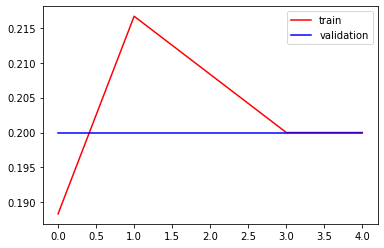

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],color='red',label='train')
plt.plot(r.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

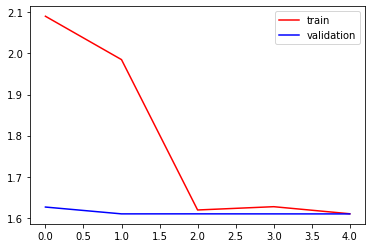

In [ ]:
plt.plot(r.history['loss'],color='red',label='train')
plt.plot(r.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()